# First data exploration for the school world exploration project

This notebook contains the pre-processing of our chosen data sets and some basic statistics to get insights about the data.
The overall project goal can be expressed as:

> Exploring global education through interactive visuals, revealing the diversity and disparities within school systems across urban and rural landscapes.

Data sets:
- [World Bank EdStats](https://datacatalog.worldbank.org/search/dataset/0038480/education-statistics)
- ...
 



In [50]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd

## Load data

In [3]:
PATH = "./data/"

# Loading the EdStats data set from the World Bank
countries = pd.read_csv(PATH+ "EdStatsCountry.csv")
country_series = pd.read_csv(PATH+"EdStatsCountry-Series.csv")
data = pd.read_csv(PATH+"EdStatsData.csv")
foot_note = pd.read_csv(PATH+"EdStatsFootNote.csv")
series = pd.read_csv(PATH+"EdStatsSeries.csv")


In [4]:
# Print available attributes
def print_columns(df, df_name):
    print("\n" + df_name)
    print(df.columns)


print_columns(countries, "Countries")
print_columns(country_series, "Country Series")
print_columns(data, "Data")
print_columns(foot_note, "Foot Note")
print_columns(series, "Series")


Countries
Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31'],
      dtype='object')

Country Series
Index(['CountryCode', 'SeriesCode', 'DESCRIPTION', 'Unnamed: 3'], dtype='object')



**The 'Country Code' and 'Series Code' attributes can be used as ids accross the dfs to link data.**

Indicator Code       Country Code
BAR.NOED.1519.FE.ZS  ABW             0
                     AFG             9
dtype: int64

<Axes: >

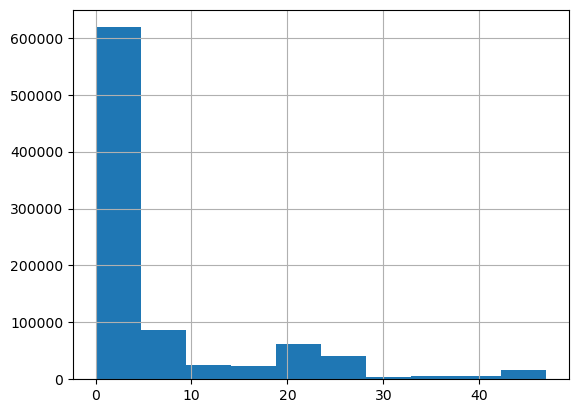

In [5]:
# Selecting data attributes with sufficient data points
number_of_years_with_data = data.groupby(["Indicator Code", "Country Code"]).count().sum(axis=1)-2
display(number_of_years_with_data.head(2))
number_of_years_with_data.sort_values(ascending=False).hist()

**If we choose to select only data for which there are > 18 years availlable**

In [6]:
#we want data that includes at least : USA, Mexico, Japan, India, and Switzerland
countries_code_we_want = ["USA", "MEX", "JPN", "IND", "CHE"]
countries[countries["Country Code"].isin(countries_code_we_want)]

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
34,CHE,Switzerland,Switzerland,Switzerland,CH,Swiss franc,NaN,Europe & Central Asia,High income: OECD,CH,...,Special Data Dissemination Standard (SDDS),2010,NaN,"Expenditure survey/budget survey (ES/BS), 2000",Yes,2008,2007.0,2012.0,2000,NaN
98,IND,India,India,Republic of India,IN,Indian rupee,Fiscal year end: March 31; reporting period fo...,South Asia,Lower middle income,IN,...,Special Data Dissemination Standard (SDDS),2011,"Demographic and Health Survey (DHS), 2005/06","Integrated household survey (IHS), 2012",NaN,2011,2009.0,2012.0,2010,NaN
107,JPN,Japan,Japan,Japan,JP,Japanese yen,Fiscal year end: March 31; reporting period fo...,East Asia & Pacific,High income: OECD,JP,...,Special Data Dissemination Standard (SDDS),2010,NaN,"Income survey (IS), 1993",Yes,2010,2010.0,2012.0,2001,NaN
141,MEX,Mexico,Mexico,United Mexican States,MX,Mexican peso,The new base year is 2008.,Latin America & Caribbean,Upper middle income,MX,...,Special Data Dissemination Standard (SDDS),2010,National Survey of Demographic Dynamics (ENADI...,"Integrated household survey (IHS), 2012",NaN,2007,2010.0,2012.0,2009,NaN
227,USA,United States,United States,United States of America,US,U.S. dollar,Fiscal year end: September 30; reporting perio...,North America,High income: OECD,US,...,Special Data Dissemination Standard (SDDS),2010,NaN,"Labor force survey (LFS), 2000",Yes,2012,2008.0,2012.0,2005,NaN


In [7]:
number_of_years_with_data_df = number_of_years_with_data.unstack(level=1)
number_of_years_with_data_df.head(2)

Country Code,ABW,AFG,AGO,ALB,AND,ARB,ARE,ARG,ARM,ASM,...,VIR,VNM,VUT,WLD,WSM,XKX,YEM,ZAF,ZMB,ZWE
Indicator Code,,,,,,,,,,,,,,,,,,,,,
BAR.NOED.1519.FE.ZS,0,9,0,9,0,0,9,9,9,0,...,0,9,0,0,0,0,9,9,9,9
BAR.NOED.1519.ZS,0,9,0,9,0,0,9,9,9,0,...,0,9,0,0,0,0,9,9,9,9


In [8]:
limit = 18
indicator_has_all_countries_wanted = (number_of_years_with_data_df[countries_code_we_want]>limit).all(axis=1)
indicators_with_countries_wanted = indicator_has_all_countries_wanted[indicator_has_all_countries_wanted].index.to_list()
print(len(indicators_with_countries_wanted))


647


In [9]:
indicators_df = data.loc[data["Indicator Code"].isin(indicators_with_countries_wanted), ["Indicator Code","Indicator Name"]].drop_duplicates().set_index("Indicator Code")
indicators_df["Number of Countries with sufficient data"] = (number_of_years_with_data_df>limit).sum(axis=1)
indicators_df["Cumuled number of years availlable"] = number_of_years_with_data_df.sum(axis=1)
indicators_df

,Indicator Name,Number of Countries with sufficient data,Cumuled number of years availlable
Indicator Code,,,
UIS.E.1.G1,"Enrolment in Grade 1 of primary education, bot...",188,7109
UIS.E.1.G1.F,"Enrolment in Grade 1 of primary education, fem...",180,6699
UIS.E.1.G2,"Enrolment in Grade 2 of primary education, bot...",185,7020
UIS.E.1.G2.F,"Enrolment in Grade 2 of primary education, fem...",177,6615
UIS.E.1.G3,"Enrolment in Grade 3 of primary education, bot...",186,7028
...,...,...,...
PRJ.POP.ALL.1.MA,Wittgenstein Projection: Population in thousan...,167,3173
PRJ.POP.ALL.1.MF,Wittgenstein Projection: Population in thousan...,167,3173
PRJ.POP.ALL.3.FE,Wittgenstein Projection: Population in thousan...,167,3173


In [10]:
data.loc[data["Indicator Code"].isin(indicators_with_countries_wanted), "Indicator Name"].unique()

array(['Enrolment in Grade 1 of primary education, both sexes (number)',
       'Enrolment in Grade 1 of primary education, female (number)',
       'Enrolment in Grade 2 of primary education, both sexes (number)',
       'Enrolment in Grade 2 of primary education, female (number)',
       'Enrolment in Grade 3 of primary education, both sexes (number)',
       'Enrolment in Grade 3 of primary education, female (number)',
       'Enrolment in Grade 4 of primary education, both sexes (number)',
       'Enrolment in Grade 4 of primary education, female (number)',
       'Enrolment in Grade 5 of primary education, both sexes (number)',
       'Enrolment in Grade 5 of primary education, female (number)',
       'Enrolment in pre-primary education, both sexes (number)',
       'Enrolment in pre-primary education, female (number)',
       'Enrolment in primary education, both sexes (number)',
       'Enrolment in primary education, female (number)',
       'Enrolment in secondary education, 

we see there are multiple linked indicators. We will try to link them

In [11]:
indicators_df["Group"] = indicators_df.index.str.split(".", n=3).to_list()
indicators_df["Part"] = indicators_df.Group.apply(lambda x : ".".join(x[2:]))
indicators_df["Group"] = indicators_df.Group.apply(lambda x : ".".join(x[:2]))
indicators_df


,Indicator Name,Number of Countries with sufficient data,Cumuled number of years availlable,Group,Part
Indicator Code,,,,,
UIS.E.1.G1,"Enrolment in Grade 1 of primary education, bot...",188,7109,UIS.E,1.G1
UIS.E.1.G1.F,"Enrolment in Grade 1 of primary education, fem...",180,6699,UIS.E,1.G1.F
UIS.E.1.G2,"Enrolment in Grade 2 of primary education, bot...",185,7020,UIS.E,1.G2
UIS.E.1.G2.F,"Enrolment in Grade 2 of primary education, fem...",177,6615,UIS.E,1.G2.F
UIS.E.1.G3,"Enrolment in Grade 3 of primary education, bot...",186,7028,UIS.E,1.G3
...,...,...,...,...,...
PRJ.POP.ALL.1.MA,Wittgenstein Projection: Population in thousan...,167,3173,PRJ.POP,ALL.1.MA
PRJ.POP.ALL.1.MF,Wittgenstein Projection: Population in thousan...,167,3173,PRJ.POP,ALL.1.MF
PRJ.POP.ALL.3.FE,Wittgenstein Projection: Population in thousan...,167,3173,PRJ.POP,ALL.3.FE


In [12]:
grouped_indicators_df = indicators_df.groupby("Group").aggregate({"Indicator Name" : "first", "Number of Countries with sufficient data" : ["min", "mean"], "Cumuled number of years availlable" : ["min", "mean"]})
grouped_indicators_df.sort_values(("Number of Countries with sufficient data", "min"), ascending=False)

Indicator Name  \
                                                           first   
Group                                                              
SH.DYN                       Mortality rate, under-5 (per 1,000)   
SP.SEC         Population of the official age for lower secon...   
SP.PRE         Population of the official age for pre-primary...   
UIS.SAP        Population of the official entrance age to pri...   
SP.TER         Population of the official age for tertiary ed...   
SP.PRM         Population of the official age for primary edu...   
IT.NET                           Internet users (per 100 people)   
SL.TLF              Labor force, female (% of total labor force)   
SL.UEM            Unemployment, female (% of female labor force)   
NY.GDP                  GDP at market prices (constant 2005 US$)   
UIS.THDUR      Theoretical duration of pre-primary education ...   
UIS.THAGE      Official entrance age to pre-primary education...   
NY.GNP                                         GNI (current US$)   
SE.PRM         Enrolment in primary education, both sexes (nu...   
SP.POP                              Population growth (annual %)   
UIS.GTVP       Percentage of female students in secondary edu...   
PRJ.MYS        Wittgenstein Projection: Mean years of schooli...   
PRJ.POP        Wittgenstein Projection: Population age 15-19 ...   
PRJ.ATT        Wittgenstein Projection: Percentage of the pop...   
UIS.E          Enrolment in Grade 1 of primary education, bot...   
SE.PRE         Enrolment in pre-primary education, both sexes...   
SE.TER         Enrolment in tertiary education, all programme...   
SE.ENR         Gross enrolment ratio, primary and secondary, ...   
SE.TOT         Gross enrolment ratio, primary to tertiary, bo...   
SE.SCH         School life expectancy, primary to tertiary, b...   
UIS.TE_100000  Enrolment in tertiary education per 100,000 in...   
UIS.SLE        School life expectancy, pre-primary, both sexe...   
UIS.GER        Gross enrolment ratio, pre-primary, gender par...   
SE.SEC         Enrolment in secondary education, both sexes (...   
IT.CMP                       Personal computers (per 100 people)   

              Number of Countries with sufficient data              \
                                                   min        mean   
Group                                                                
SH.DYN                                             217  217.000000   
SP.SEC                                             215  215.000000   
SP.PRE                                             215  215.000000   
UIS.SAP                                            214  214.333333   
SP.TER                                             214  214.000000   
SP.PRM                                             214  214.000000   
IT.NET                                             213  213.000000   
SL.TLF                                             211  211.000000   
SL.UEM                                             211  211.000000   
NY.GDP                                             206  211.000000   
UIS.THDUR                                          202  202.000000   
UIS.THAGE                                          201  201.000000   
NY.GNP                                             200  205.500000   
SE.PRM                                             194  201.250000   
SP.POP                                             180  182.969072   
UIS.GTVP                                           170  176.666667   
PRJ.MYS                                            167  167.000000   
PRJ.POP                                            167  167.000000   
PRJ.ATT                                            163  166.979798   
UIS.E                                              157  177.400000   
SE.PRE                                             147  153.500000   
SE.TER                                             141  151.833333   
SE.ENR                                             140 

In [13]:
grouped_indicators_df.apply(lambda x : print(f"{x.name:10s} : ", x["Indicator Name", "first"]), axis=1)
None

IT.CMP     :  Personal computers (per 100 people)
IT.NET     :  Internet users (per 100 people)
NY.GDP     :  GDP at market prices (constant 2005 US$)
NY.GNP     :  GNI (current US$)
PRJ.ATT    :  Wittgenstein Projection: Percentage of the population age 15+ by highest level of educational attainment. Incomplete Primary. Female
PRJ.MYS    :  Wittgenstein Projection: Mean years of schooling. Age 0-19. Female
PRJ.POP    :  Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Incomplete Primary. Female
SE.ENR     :  Gross enrolment ratio, primary and secondary, gender parity index (GPI)
SE.PRE     :  Enrolment in pre-primary education, both sexes (number)
SE.PRM     :  Enrolment in primary education, both sexes (number)
SE.SCH     :  School life expectancy, primary to tertiary, both sexes (years)
SE.SEC     :  Enrolment in secondary education, both sexes (number)
SE.TER     :  Enrolment in tertiary education, all programmes, both sexes (nu

This looks like a nice selection of different indicators. We will have a look at some of them for now :
- SE.ENR : Gender parity index in Gross enrolment raito
- SE.SCH : School life expectancy
- UIS.TE_100000 : Enrolment in tertiary education per 100'000

In [14]:
display(indicators_df.loc[indicators_df.Group == "SE.ENR", "Indicator Name"])
display(indicators_df.loc[indicators_df.Group == "SE.SCH", "Indicator Name"])
display(indicators_df.loc[indicators_df.Group == "UIS.TE_100000", "Indicator Name"])


Indicator Code
SE.ENR.PRSC.FM.ZS    Gross enrolment ratio, primary and secondary, ...
SE.ENR.PRIM.FM.ZS    Gross enrolment ratio, primary, gender parity ...
SE.ENR.SECO.FM.ZS    Gross enrolment ratio, secondary, gender parit...
SE.ENR.TERT.FM.ZS    Gross enrolment ratio, tertiary, gender parity...
Name: Indicator Name, dtype: object

Indicator Code
SE.SCH.LIFE       School life expectancy, primary to tertiary, b...
SE.SCH.LIFE.FE    School life expectancy, primary to tertiary, f...
SE.SCH.LIFE.MA    School life expectancy, primary to tertiary, m...
Name: Indicator Name, dtype: object

Indicator Code
UIS.TE_100000.56      Enrolment in tertiary education per 100,000 in...
UIS.TE_100000.56.F    Enrolment in tertiary education per 100,000 in...
UIS.TE_100000.56.M    Enrolment in tertiary education per 100,000 in...
Name: Indicator Name, dtype: object

## Visual exploration 


In [15]:
# TODO explore data youpi !
# idea of things to look at
# for numerical var:
    # histograms, box plots, scatter plots, correlation matrices... 
# for categorical var:
    # bar charts ...
# basic stats on data
# get insight on distribution, outliers ect.


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

In [127]:
def get_indicators(group):
    return indicators_df.loc[indicators_df.Group == group].index.to_list()

def plot_years_matrix(group):
    indicators = get_indicators(group)
    df = data.loc[(data["Indicator Code"].isin(indicators))*(data["Country Code"].isin(countries_code_we_want))].drop(["Country Name", "Country Code", "Indicator Name"], axis=1)
    df = df.groupby("Indicator Code").count()
    plt.figure(figsize=(6,1))
    sns.heatmap(df, cmap="crest")
    plt.savefig(f"{group.replace('.','')}_yearmatrix")

def plot_indicators(group):
    indicators = get_indicators(group)
    df = data.loc[(data["Indicator Code"].isin(indicators))*(data["Country Code"].isin(countries_code_we_want))]
    df = df.set_index(["Indicator Code", "Indicator Name", "Country Code", "Country Name"]).rename_axis("Year", axis=1).stack().rename("Value").reset_index()
    df["Year"] = df.Year.astype("int")
    (
        so.Plot(data=df, y="Value", color="Country Name", x="Year")
        .facet(row="Indicator Name")
        .add(so.Dots())
        .add(so.Line())
        .layout(size=(10, 10), engine="tight")
        .plot(pyplot=True)
    )
    plt.xticks(rotation=90)
    plt.savefig(f"{group.replace('.','')}_indicators")
    plt.show()

def plot_histograms(group):
    indicators = get_indicators(group)
    df = data.loc[(data["Indicator Code"].isin(indicators))*(data["Country Code"].isin(countries_code_we_want))]
    df = df.set_index(["Indicator Code", "Indicator Name", "Country Code", "Country Name"]).rename_axis("Year", axis=1).stack().rename("Value").reset_index()
    df["Year"] = df.Year.astype("int")
    (
        so.Plot(data=df, x="Value", color="Country Name")
        .facet(row="Indicator Name", wrap=2)
        .add(so.Bars(), so.Hist(), so.Stack())
        .layout(size=(10, 10), engine="tight")
        .plot(pyplot=True)
    )
    plt.suptitle("Histograms")
    plt.savefig(f"{group.replace('.','')}_histograms")
    plt.show()

def print_statistics(group):
    indicators = get_indicators(group)
    df = data.loc[(data["Indicator Code"].isin(indicators))*(data["Country Code"].isin(countries_code_we_want))]
    df = df.set_index(["Indicator Code", "Indicator Name", "Country Code", "Country Name"]).rename_axis("Year", axis=1).stack().rename("Value").reset_index()
    display(df.groupby("Indicator Code").describe().to_markdown())
    display(df.groupby(["Indicator Code", "Country Code"]).describe().to_markdown())



### SE.ENR

In [128]:
print_statistics("SE.ENR")

ImportError: Missing optional dependency 'tabulate'.  Use pip or conda to install tabulate.

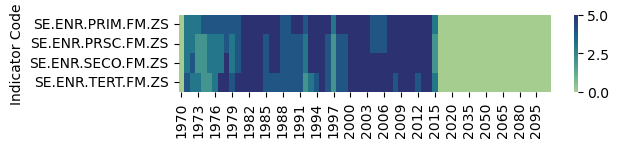

In [118]:
plot_years_matrix("SE.ENR")

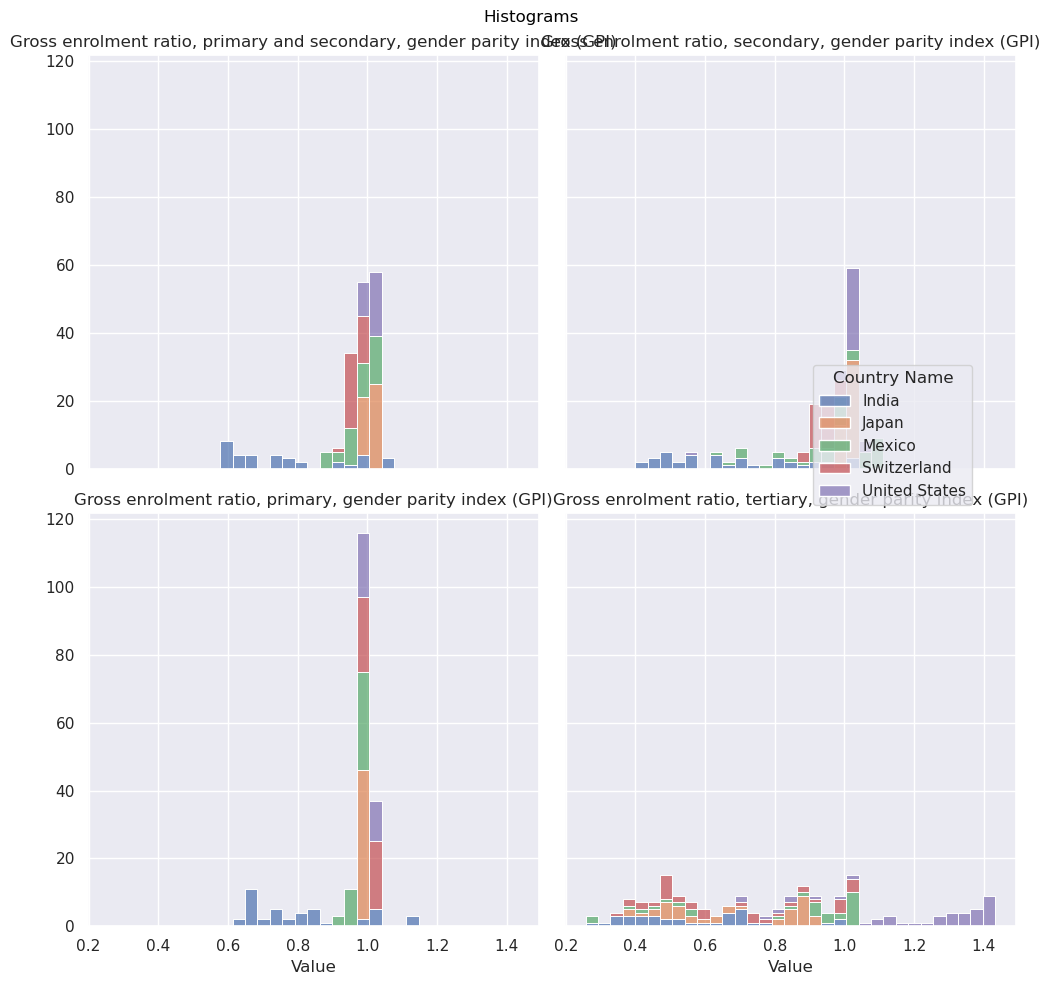

In [119]:
plot_histograms("SE.ENR")

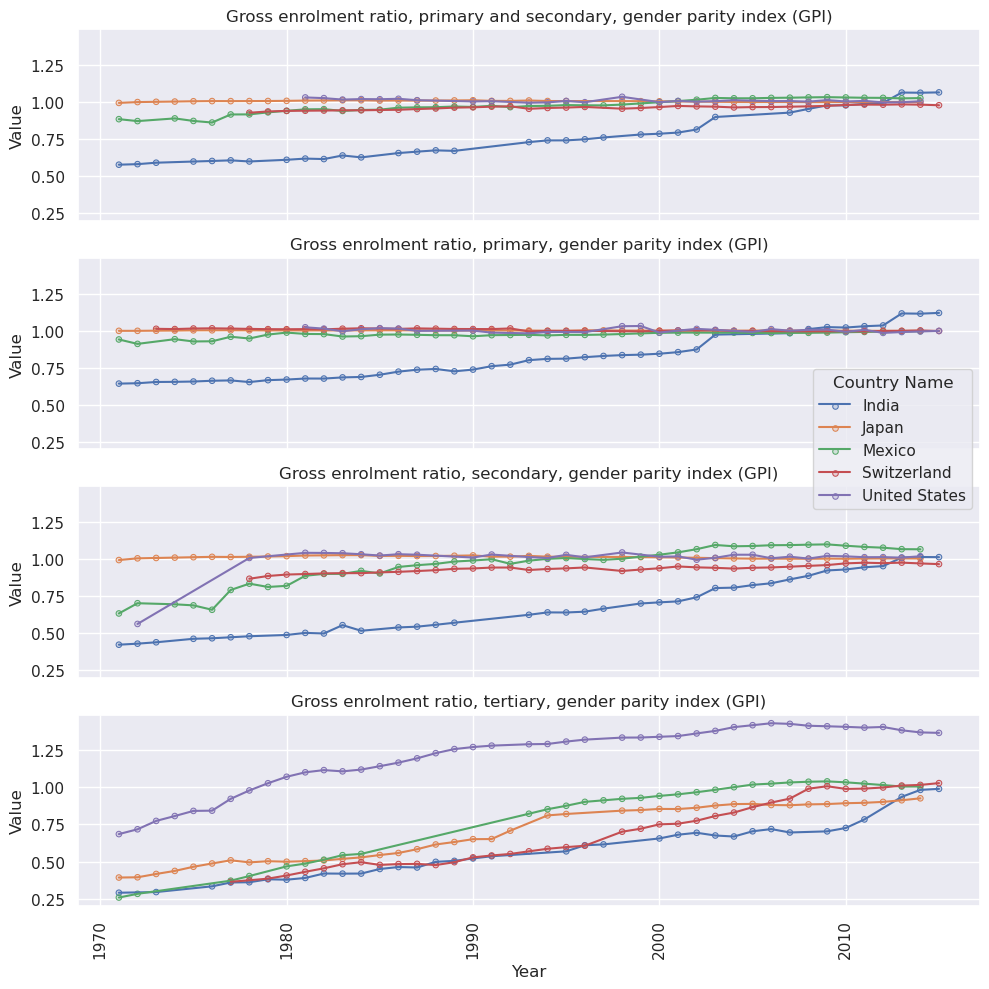

In [120]:
plot_indicators("SE.ENR")

### SE.SCH

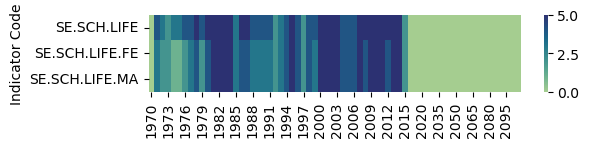

In [121]:
plot_years_matrix("SE.SCH")

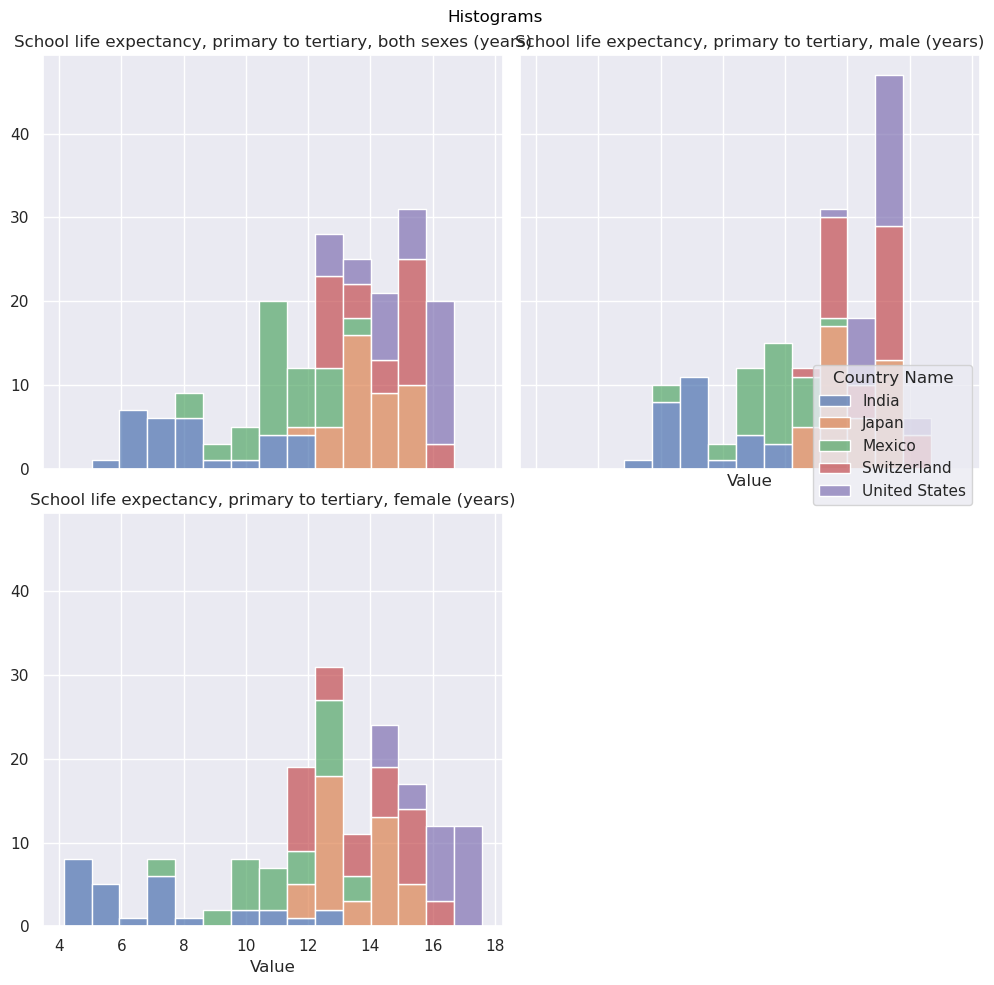

In [122]:
plot_histograms("SE.SCH")

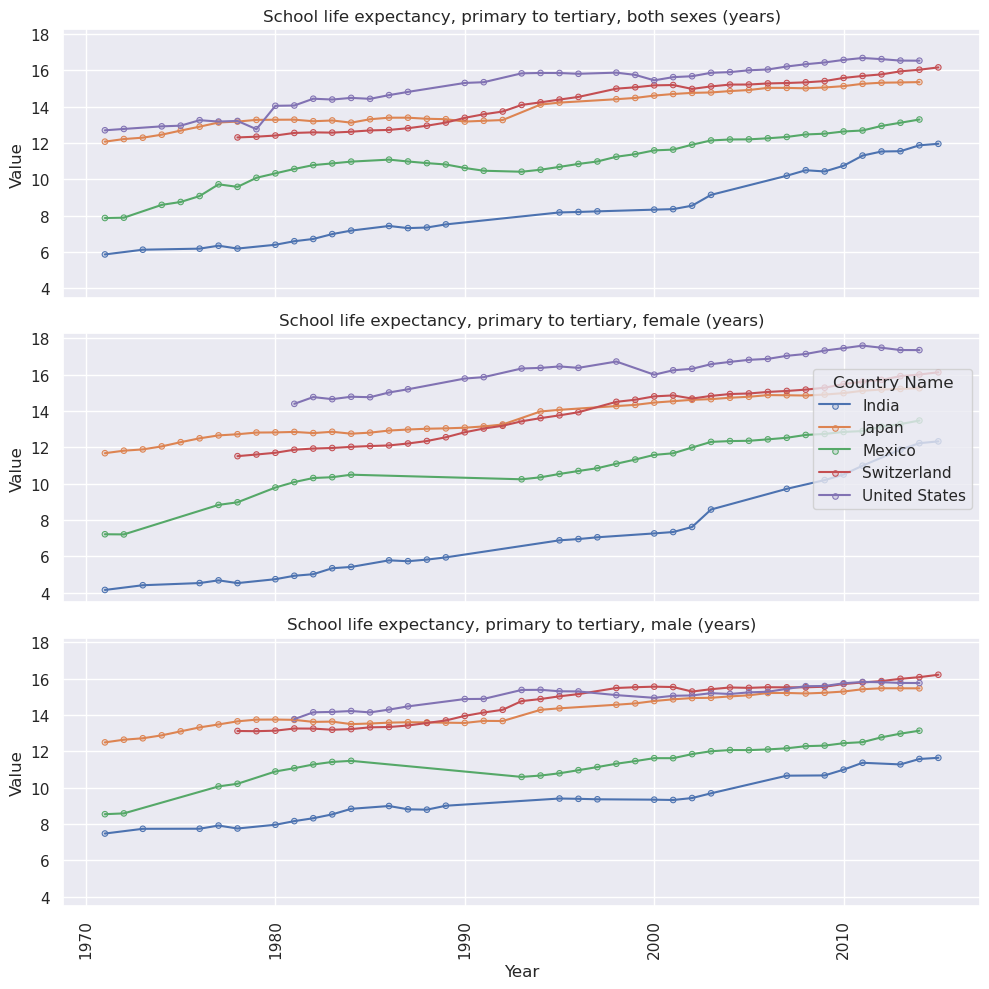

In [123]:
plot_indicators("SE.SCH")

### UIS.TE_100000

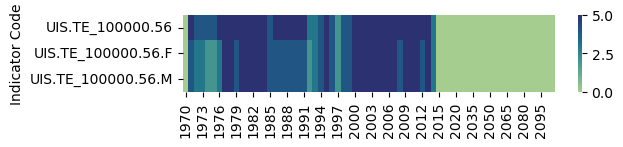

In [124]:
plot_years_matrix("UIS.TE_100000")

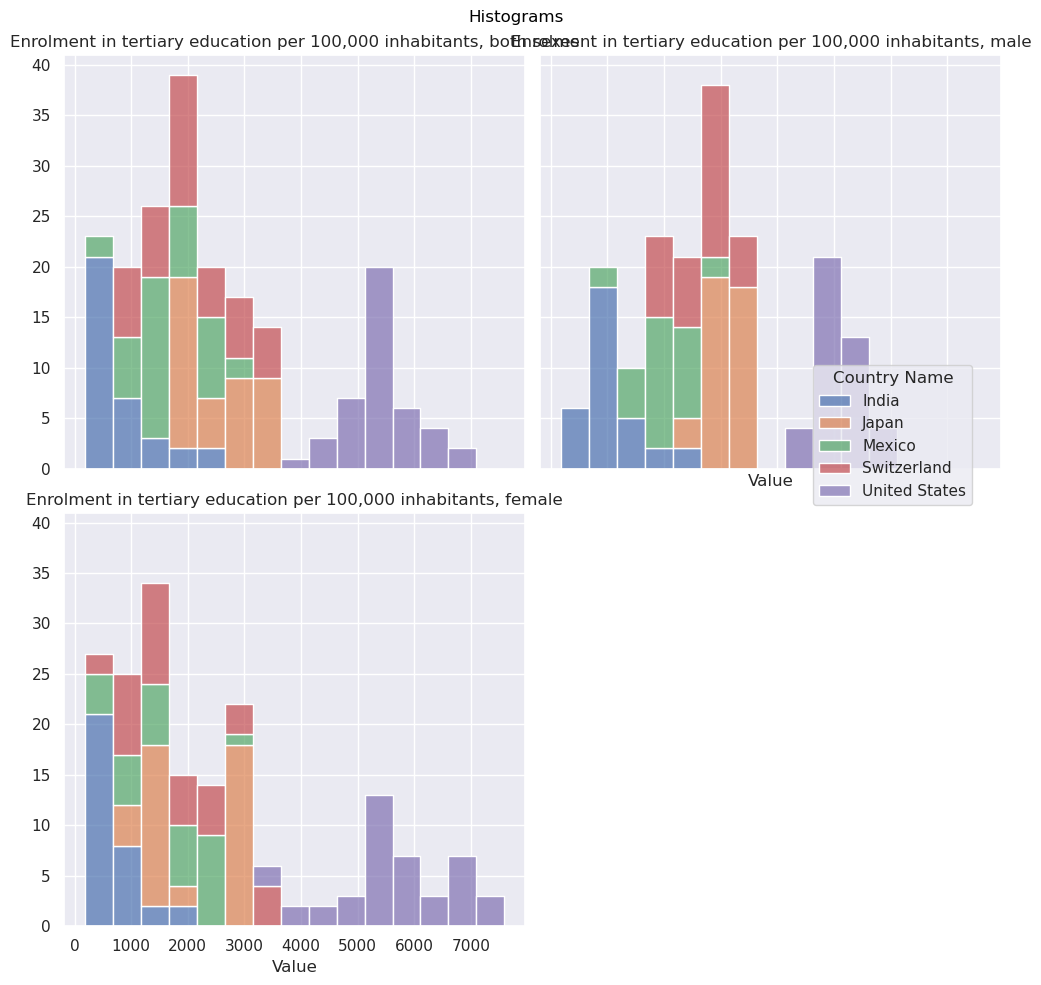

In [125]:
plot_histograms("UIS.TE_100000")

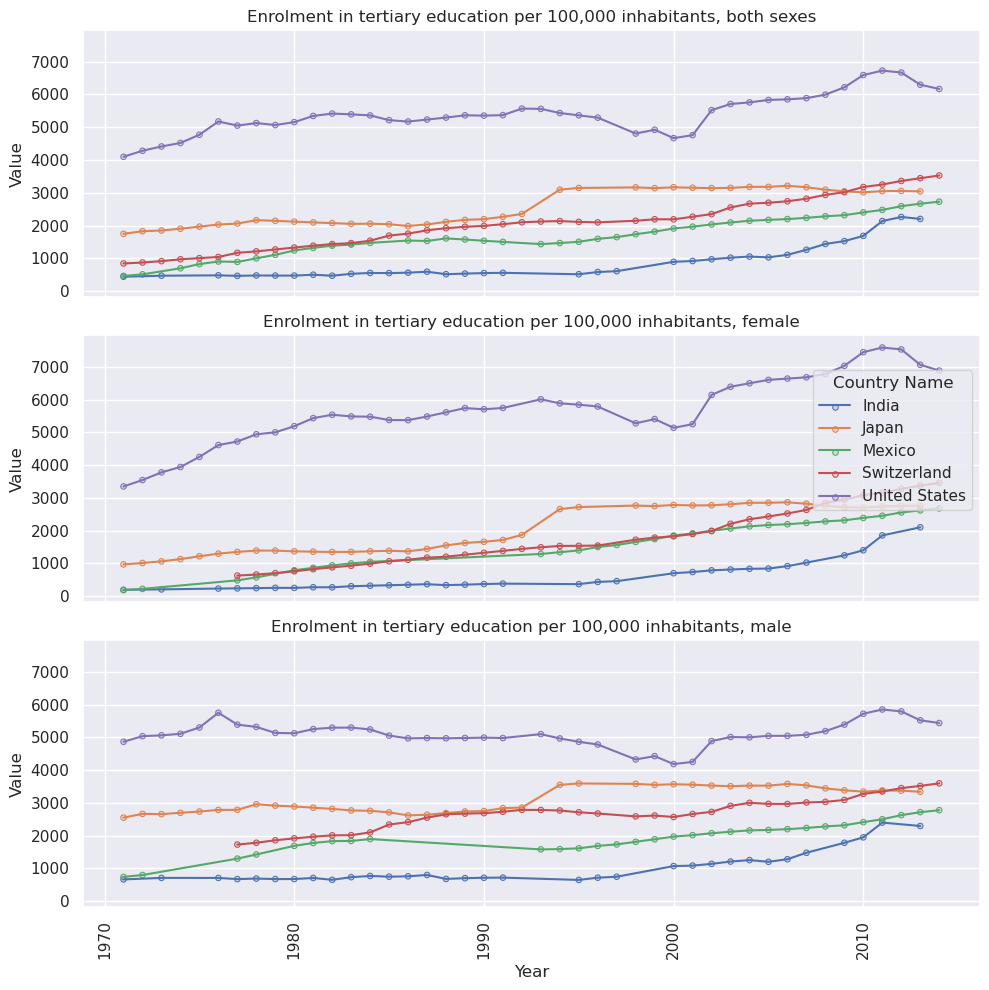

In [126]:
plot_indicators("UIS.TE_100000")